In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv('traffic_accidents.csv')

/tmp/ipykernel_9997/4282424767.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('traffic_accidents.csv')


In [3]:
df.head()

,shape,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y
0,<geoprocessing describe geometry object object...,202215079.0,20221507954410,5441.0,0.0,TRAF - ACCIDENT,2022-01-10 17:00:00,2022-01-10 17:00:00,2022-01-10 17:02:00,8800 BLOCK E MLK BLVD,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
1,<geoprocessing describe geometry object object...,202245681.0,20224568154010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2022-01-27 15:00:00,2022-01-27 15:00:00,2022-01-28 10:44:00,4200 E BRUCE RANDOLPH AVE,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
2,<geoprocessing describe geometry object object...,202238410.0,20223841054410,5441.0,0.0,TRAF - ACCIDENT,2022-01-24 07:56:00,2022-01-24 07:56:00,2022-01-24 08:38:00,7900 BLOCK W LAYTON AVE,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
3,<geoprocessing describe geometry object object...,202238474.0,20223847454410,5441.0,0.0,TRAF - ACCIDENT,2022-01-24 08:30:00,2022-01-24 08:30:00,2022-01-24 09:14:00,I70 HWYEB / N FEDERAL BLVD,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
4,<geoprocessing describe geometry object object...,202238536.0,20223853654010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2022-01-24 09:19:00,2022-01-24 09:19:00,2022-01-24 09:56:00.000001,1001 S PLATTE RIVER DR,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209660 entries, 0 to 209659
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   shape                          201585 non-null  object 
 1   incident_id                    209659 non-null  float64
 2   offense_id                     209660 non-null  int64  
 3   offense_code                   209659 non-null  float64
 4   offense_code_extension         209659 non-null  float64
 5   top_traffic_accident_offense   209659 non-null  object 
 6   first_occurrence_date          209659 non-null  object 
 7   last_occurrence_date           114060 non-null  object 
 8   reported_date                  209659 non-null  object 
 9   incident_address               209659 non-null  object 
 10  geo_x                          201585 non-null  float64
 11  geo_y                          201585 non-null  float64
 12  geo_lon                       

In [5]:
df.isnull().sum()

shape                              8075
incident_id                           1
offense_id                            0
offense_code                          1
offense_code_extension                1
top_traffic_accident_offense          1
first_occurrence_date                 1
last_occurrence_date              95600
reported_date                         1
incident_address                      1
geo_x                              8075
geo_y                              8075
geo_lon                            8075
geo_lat                            8075
district_id                        2748
precinct_id                        8126
neighborhood_id                    9974
bicycle_ind                       12441
pedestrian_ind                    12441
HARMFUL_EVENT_SEQ_1                   1
HARMFUL_EVENT_SEQ_2                   1
HARMFUL_EVENT_SEQ_3                   1
road_location                         1
ROAD_DESCRIPTION                      1
ROAD_CONTOUR                          1


In [6]:
df['reported_date']= pd.to_datetime(df['reported_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209660 entries, 0 to 209659
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   shape                          201585 non-null  object        
 1   incident_id                    209659 non-null  float64       
 2   offense_id                     209660 non-null  int64         
 3   offense_code                   209659 non-null  float64       
 4   offense_code_extension         209659 non-null  float64       
 5   top_traffic_accident_offense   209659 non-null  object        
 6   first_occurrence_date          209659 non-null  object        
 7   last_occurrence_date           114060 non-null  object        
 8   reported_date                  209659 non-null  datetime64[ns]
 9   incident_address               209659 non-null  object        
 10  geo_x                          201585 non-null  float64       
 11  

In [8]:
df.head()

,shape,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y
0,<geoprocessing describe geometry object object...,202215079.0,20221507954410,5441.0,0.0,TRAF - ACCIDENT,2022-01-10 17:00:00,2022-01-10 17:00:00,2022-01-10 17:02:00.000000,8800 BLOCK E MLK BLVD,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
1,<geoprocessing describe geometry object object...,202245681.0,20224568154010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2022-01-27 15:00:00,2022-01-27 15:00:00,2022-01-28 10:44:00.000000,4200 E BRUCE RANDOLPH AVE,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
2,<geoprocessing describe geometry object object...,202238410.0,20223841054410,5441.0,0.0,TRAF - ACCIDENT,2022-01-24 07:56:00,2022-01-24 07:56:00,2022-01-24 08:38:00.000000,7900 BLOCK W LAYTON AVE,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
3,<geoprocessing describe geometry object object...,202238474.0,20223847454410,5441.0,0.0,TRAF - ACCIDENT,2022-01-24 08:30:00,2022-01-24 08:30:00,2022-01-24 09:14:00.000000,I70 HWYEB / N FEDERAL BLVD,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN
4,<geoprocessing describe geometry object object...,202238536.0,20223853654010,5401.0,0.0,TRAF - ACCIDENT - HIT & RUN,2022-01-24 09:19:00,2022-01-24 09:19:00,2022-01-24 09:56:00.000001,1001 S PLATTE RIVER DR,...,OTHER,OTHER,0.0,0.0,OTHER,OTHER,OTHER,OTHER,NaN,NaN


In [17]:
df['FATALITIES'].value_counts()

0.0    208753
1.0       458
2.0        20
3.0         1
Name: FATALITIES, dtype: int64

<AxesSubplot:xlabel='count', ylabel='top_traffic_accident_offense'>

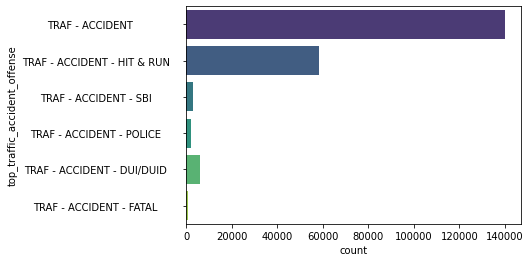

In [9]:
sns.countplot(y = 'top_traffic_accident_offense',data = df, palette='viridis')

In [10]:
df['reported_date'].iloc[0]

Timestamp('2022-01-10 17:02:00')

In [11]:
time = df['reported_date'].iloc[0]
df['Hour'] = df['reported_date'].apply(lambda time:time.hour)
df['Month'] = df['reported_date'].apply(lambda time: time.month)
df['Day of Week'] = df['reported_date'].apply(lambda time: time.dayofweek)

In [12]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

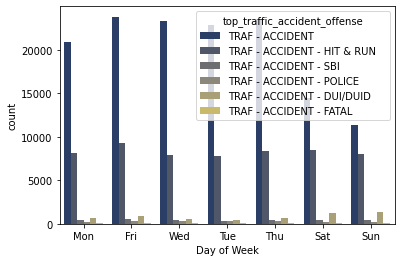

In [13]:
sns.countplot(x='Day of Week', data = df, hue='top_traffic_accident_offense',palette='cividis')

<AxesSubplot:xlabel='Month', ylabel='count'>

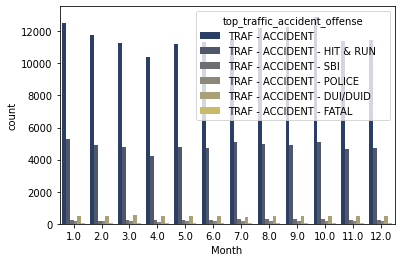

In [14]:
sns.countplot(x = 'Month', data = df, hue='top_traffic_accident_offense', palette = 'cividis')

<AxesSubplot:xlabel='Month', ylabel='count'>

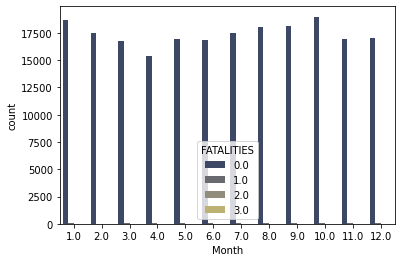

In [20]:
sns.countplot(x ='Month', data = df, hue ='FATALITIES', palette = 'cividis')

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

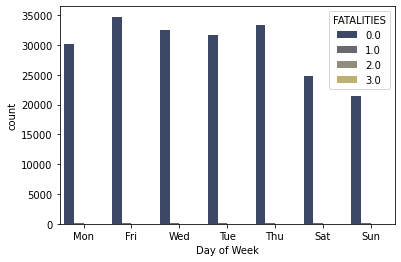

In [21]:
sns.countplot(x='Day of Week', data = df, hue='FATALITIES', palette = 'cividis')

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

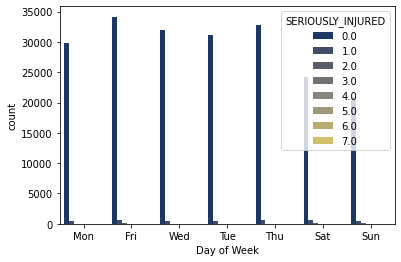

In [29]:
sns.countplot(x='Day of Week',data = df, hue='SERIOUSLY_INJURED', palette = 'cividis')

In [15]:
byMonth=df.groupby('Month').count()
byMonth.head()

,shape,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,,,
1.0,17981,18758,18758,18758,18758,18758,18758,9902,18758,18758,...,18723,18723,18758,18758,18758,18758,0,0,18758,18758
2.0,16860,17566,17566,17566,17566,17566,17566,10414,17566,17566,...,17511,17511,17566,17566,17566,17566,0,0,17566,17566
3.0,16342,17012,17012,17012,17012,17012,17012,9796,17012,17012,...,16813,16813,17012,17012,17012,17012,0,0,17012,17012
4.0,14849,15418,15418,15418,15418,15418,15418,8060,15418,15418,...,15394,15394,15418,15418,15418,15418,0,0,15418,15418
5.0,16360,16969,16969,16969,16969,16969,16969,9159,16969,16969,...,16952,16952,16969,16969,16969,16969,0,0,16969,16969


<AxesSubplot:xlabel='Month'>

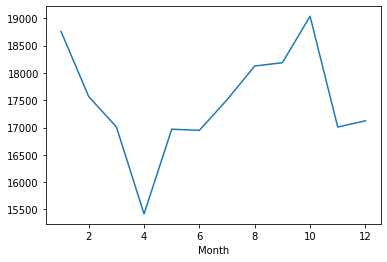

In [18]:
byMonth['incident_address'].plot()

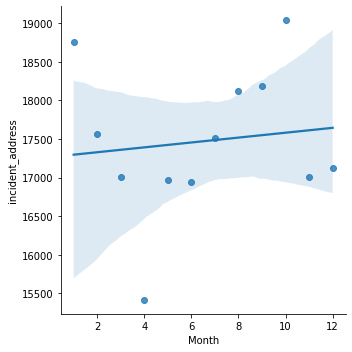

In [19]:
sns.lmplot(x='Month', y = 'incident_address', data = byMonth.reset_index())

In [22]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['incident_id'].unstack()
dayHour.head()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,497,398,408,297,202,254,601,1388,1986,1845,...,2129,2538,2686,2664,2289,1867,1406,1231,1290,1059
Mon,533,409,363,237,194,283,567,1525,1956,1888,...,1855,2228,2363,2499,2075,1399,957,747,777,487
Sat,815,762,885,659,400,343,285,481,640,887,...,1592,1563,1511,1567,1421,1258,1128,1078,1206,1053
Sun,827,825,1023,739,522,339,292,448,542,704,...,1266,1314,1183,1188,1150,1089,959,887,977,698
Thu,458,330,286,206,157,259,665,1668,2349,2009,...,2051,2271,2563,2691,2370,1655,1195,1015,993,685


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

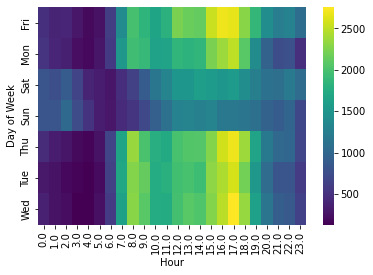

In [23]:
sns.heatmap(dayHour, cmap='viridis')

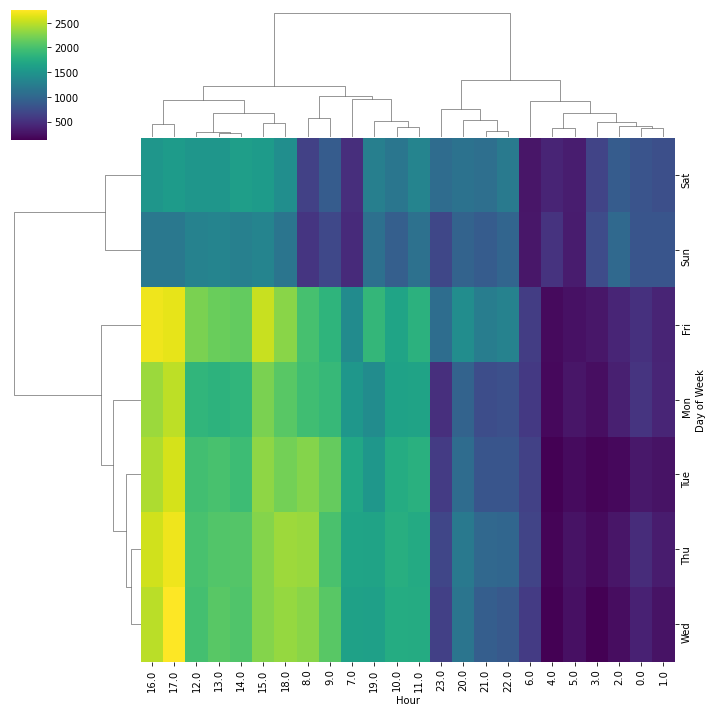

In [24]:
sns.clustermap(dayHour, cmap='viridis')

In [25]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['incident_id'].unstack()
dayMonth.head()

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Day of Week,,,,,,,,,,,,
Fri,3261,2994,2929,2572,2884,2798,2728,3042,2964,3128,2793,2804
Mon,2568,2512,2422,2273,2281,2562,2637,2739,2438,2689,2535,2657
Sat,2076,2085,2144,1842,2091,2007,2075,2128,2167,2409,2061,1955
Sun,1864,1721,1734,1546,1696,1808,1728,1921,1955,1998,1759,1881
Thu,3052,2847,2706,2438,2750,2707,2732,2860,2900,3149,2536,2749


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

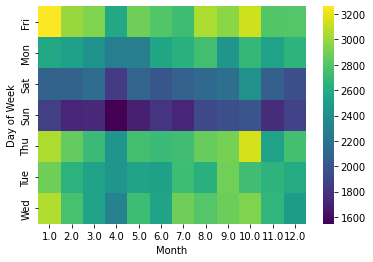

In [26]:
sns.heatmap(dayMonth, cmap='viridis')

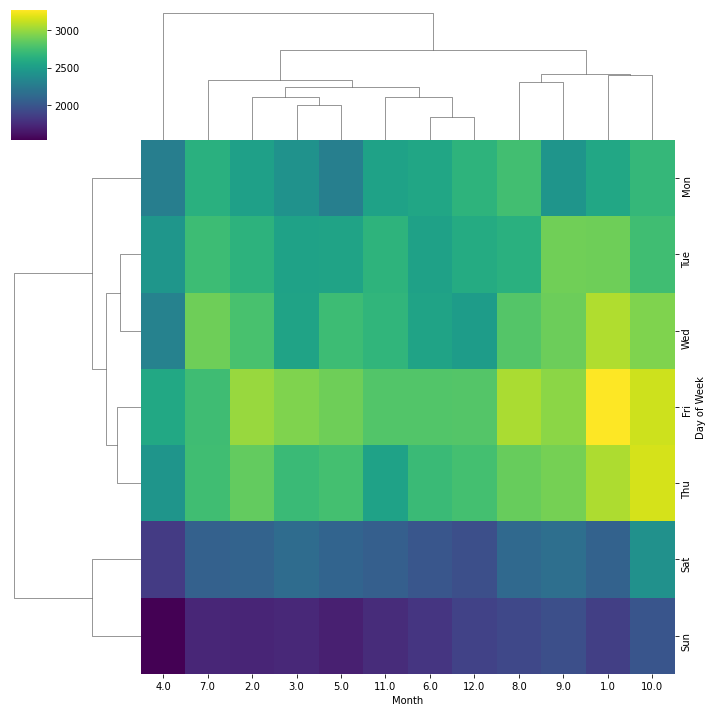

In [27]:
sns.clustermap(dayMonth, cmap='viridis')

In [32]:
df['Day of Week'].value_counts()\
                .head(20)\
                .to_frame(name = 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='Blues', subset='count')

,index,count
0,Fri,34897
1,Thu,33426
2,Wed,32561
3,Tue,31811
4,Mon,30313
5,Sat,25040
6,Sun,21611


In [36]:
df['Month'].value_counts()\
            .head(12)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset = 'Count')

,index,Count
0,10.000000,19037
1,1.000000,18758
2,9.000000,18186
3,8.000000,18126
4,2.000000,17566
5,7.000000,17508
6,12.000000,17123
7,3.000000,17012
8,11.000000,17008
9,5.000000,16969


In [37]:
df['top_traffic_accident_offense'].value_counts()\
                                    .head(20)\
                                    .to_frame(name='Count')\
                                    .reset_index()\
                                    .style.background_gradient(cmap='Blues', subset = 'Count')

,index,Count
0,TRAF - ACCIDENT,140188
1,TRAF - ACCIDENT - HIT & RUN,58182
2,TRAF - ACCIDENT - DUI/DUID,5818
3,TRAF - ACCIDENT - SBI,3014
4,TRAF - ACCIDENT - POLICE,1939
5,TRAF - ACCIDENT - FATAL,518


In [ ]:
df['']